In [31]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison

In [3]:
# Task 1: Data Preparation and Exploration
# Read the dataset
data = pd.read_csv('Employee_Performance.csv')
print(data.head())

   EmployeeID Department  Gender  Experience  TrainingHours  \
0        1001         IT    Male           4              5   
1        1002  Marketing  Female           0             50   
2        1003      Sales    Male           0              5   
3        1004         HR    Male           1              5   
4        1005         HR  Female           9              5   

   PerformanceRating  Salary  
0               1.00   19000  
1               5.50    6900  
2               1.00    6000  
3               1.00    6000  
4               1.04   38000  


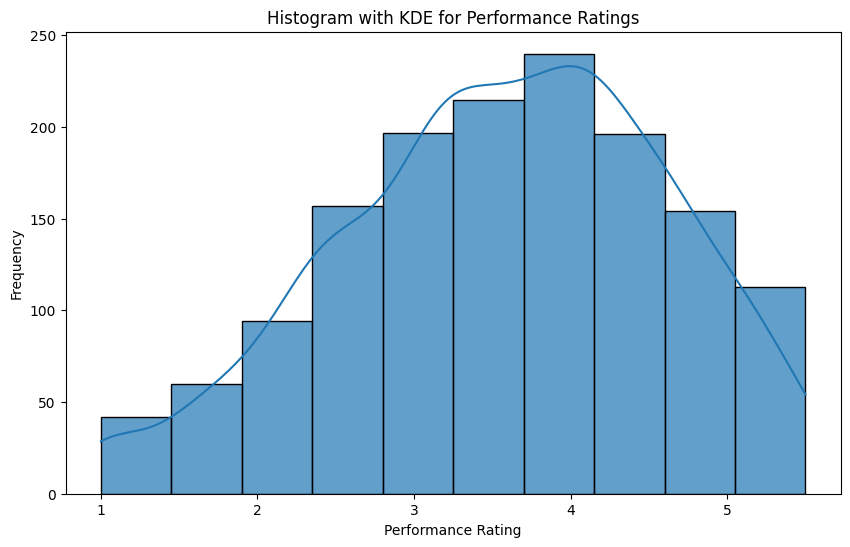

In [4]:
# Task 1: Data Preparation and Exploration
# Histogram of performance ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='PerformanceRating', kde=True, bins=10, alpha=0.7)
plt.title('Histogram with KDE for Performance Ratings')
plt.xlabel('Performance Rating')
plt.ylabel('Frequency')
plt.show()

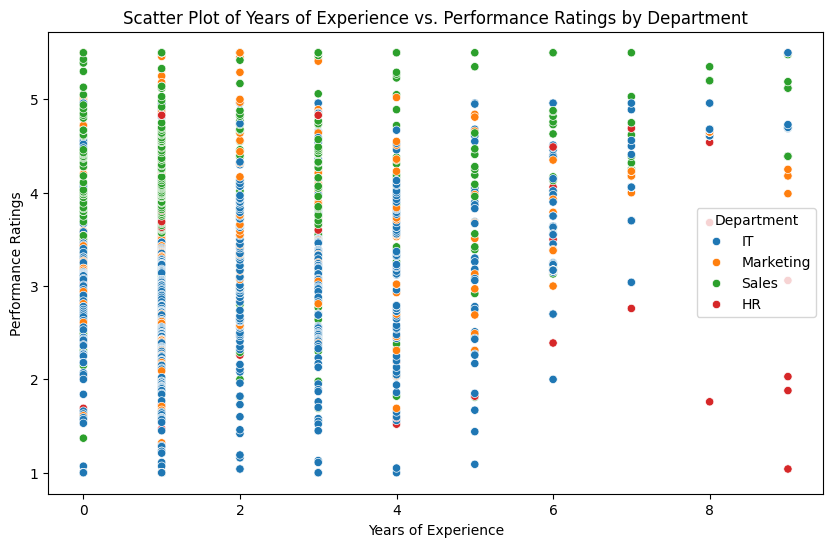

In [5]:
# Task 1: Data Preparation and Exploration
# Scatter plot of performance ratings by detpartment compared to years of experience
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Experience', y='PerformanceRating', hue='Department')
plt.xlabel('Years of Experience')
plt.ylabel('Performance Ratings')
plt.title('Scatter Plot of Years of Experience vs. Performance Ratings by Department')
plt.show()

In [6]:
# Task 1: Data Preparation and Exploration
# Performance ratings by department
grouped_data = [data[data['Department'] == department]['PerformanceRating'] for department in data['Department'].unique()]
f_statistic, p_value = stats.f_oneway(*grouped_data) # Perform one-way ANOVA

# Degrees of freedom
df_between = len(data['Department'].unique()) - 1 
df_within = len(data) - len(data['Department'].unique())
alpha = 0.05 # Significance level
critical_f_value = stats.f.ppf(1 - alpha, df_between, df_within) # Calculate the critical F-value based on alpha and degrees of freedom

print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"Critical F-value: {critical_f_value:.2f}")
print(f"P-value: {p_value:.4f}")

One-way ANOVA Results:
F-statistic: 61.45
Critical F-value: 2.61
P-value: 0.0000


In [7]:
# Task 1: Data Preparation and Exploration
# Tuke's HSD Post Hoc Test
multicomp = MultiComparison(data['PerformanceRating'], data['Department'])
result = multicomp.tukeyhsd()

print("\nTukey's HSD Post Hoc Test:")
print(result)


Tukey's HSD Post Hoc Test:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
       HR        IT   0.3715 0.0217  0.0384 0.7047   True
       HR Marketing    1.027    0.0  0.6681  1.386   True
       HR     Sales   1.0256    0.0  0.6843 1.3669   True
       IT Marketing   0.6555    0.0  0.4665 0.8445   True
       IT     Sales   0.6541    0.0  0.5012  0.807   True
Marketing     Sales  -0.0014    1.0 -0.2044 0.2017  False
---------------------------------------------------------


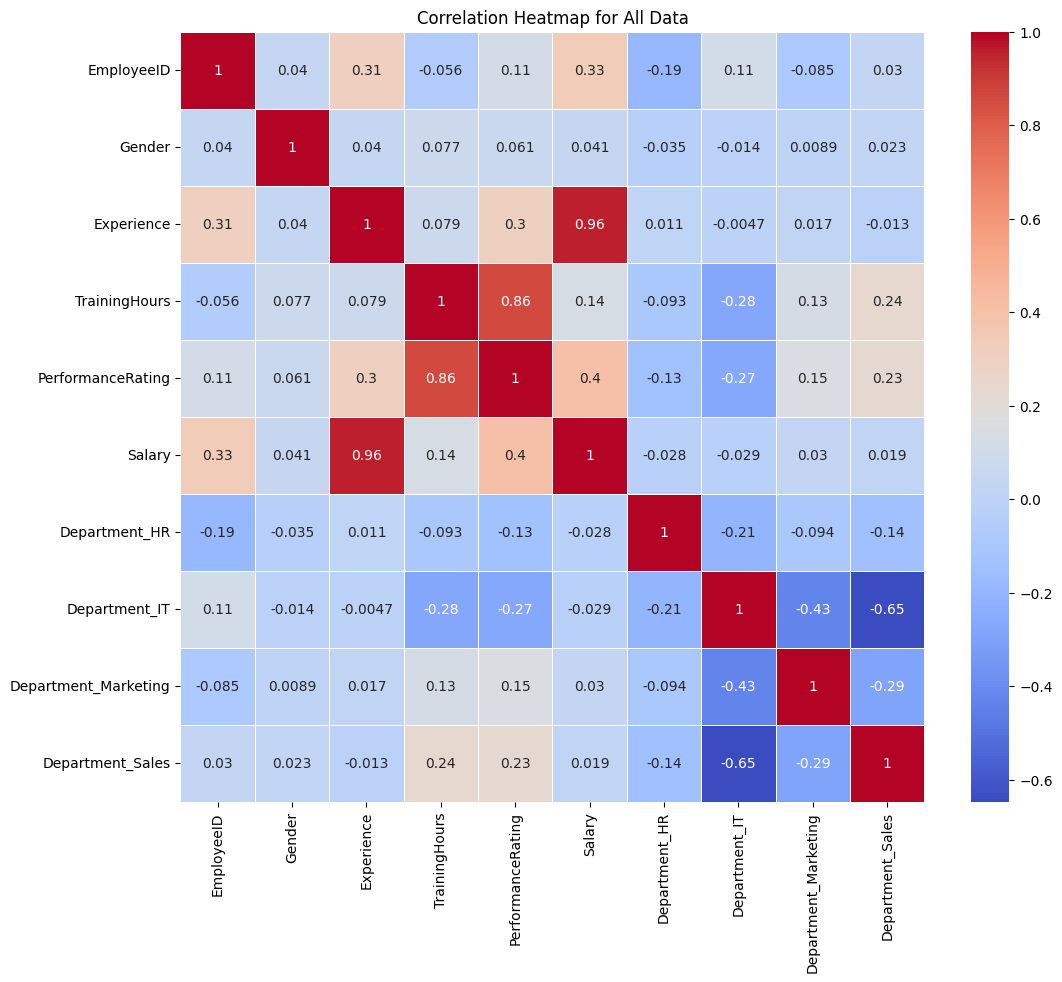

In [19]:
#Task 2
#Step 1.3: Calculate the correlation matrix

dataHeat = pd.get_dummies(data, columns=['Department'], prefix='Department')
dataHeat['Gender'] = dataHeat['Gender'].apply(lambda x: 0 if x == 'Male' else 1)

corr_matrix = dataHeat.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for All Data')
plt.show()

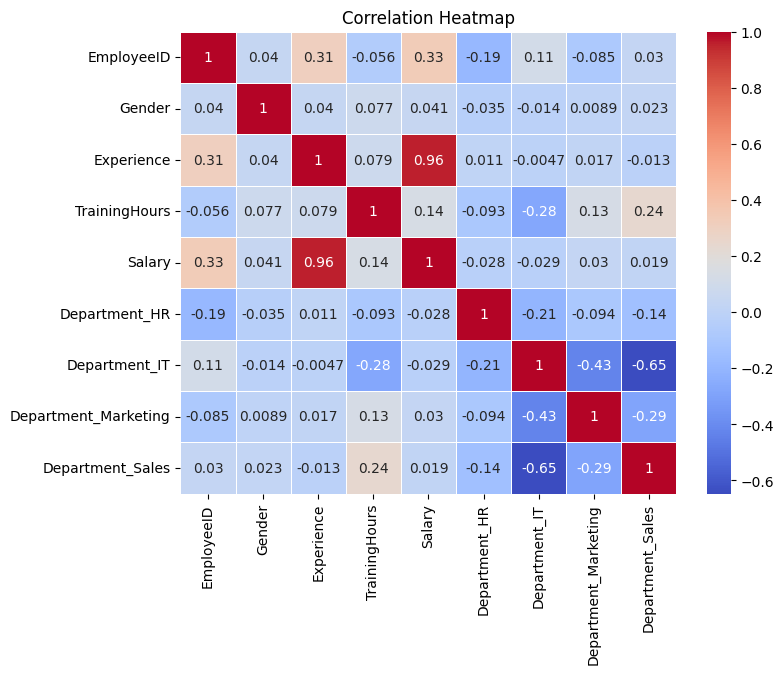

In [20]:
#Step 2: Select predictor variables (features) and the target variable (PT08.S1(CO)):
# Select independent variables
X = dataHeat[[ 'EmployeeID', 'Gender', 'Experience', 'TrainingHours', 'Salary', 'Department_HR','Department_IT','Department_Marketing','Department_Sales']]
# Dependent variable
y = dataHeat['PerformanceRating']


#Step 3.1:Check for multicollinearity using a heatmap
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [23]:
#remove experience
dataHeat = data.drop("Experience", axis=1)
X = dataHeat[[ 'EmployeeID', 'Gender', 'TrainingHours', 'Salary']]


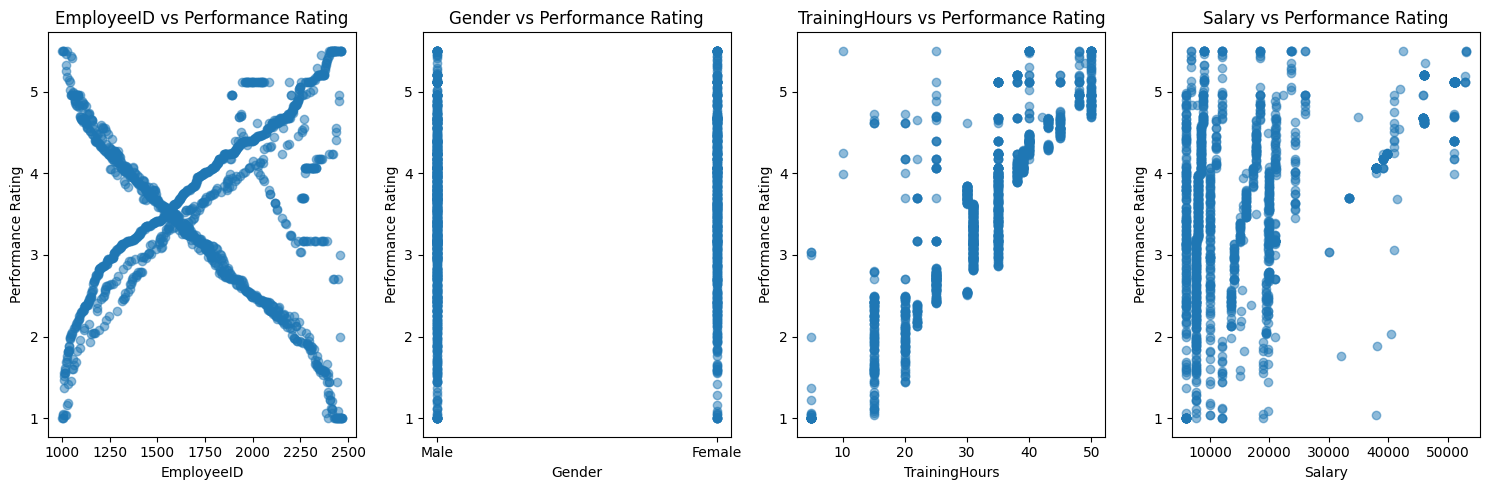

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], y, alpha=0.5)
    axes[i].set_title(f'{col} vs Performance Rating')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Performance Rating')

plt.tight_layout()
plt.show()

In [28]:
X = data[[ 'TrainingHours', 'Salary', 'EmployeeID']]

# Dependent variable
y = data['PerformanceRating']

In [33]:
X = sm.add_constant(X)
# Step 4.3 Fit the multiple linear regression model
model = sm.OLS(y, X).fit()
#step 4.4: Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      PerformanceRating   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     2345.
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:25:50   Log-Likelihood:                -856.21
No. Observations:                1468   AIC:                             1720.
Df Residuals:                    1464   BIC:                             1742.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1357      0.062      2.194

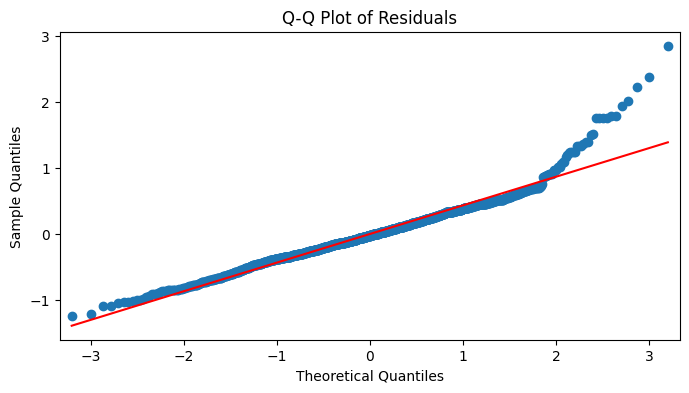

Anderson-Darling Statistic: 6.924249559006967
Critical Values: [0.574 0.654 0.785 0.916 1.089]
Significance Levels: [15.  10.   5.   2.5  1. ]


'\nAnderson-Darling Statistic: 4.29 is greater than Critical Value of (0.782) at Significance Levels of 5; reject the H0\n'

In [34]:
# Step 5: Get the residuals
residuals = model.resid

# Step 5.1: Residual plot for normality check
# Create a Q-Q plot to check for normality
fig, ax = plt.subplots(figsize=(8, 4))
sm.qqplot(residuals, line='s', ax=ax)
plt.title("Q-Q Plot of Residuals")
plt.show()



# Perform the Anderson-Darling test for normality
result = stats.anderson(residuals, dist='norm')

# Extract the test statistic, critical values, and significance levels
ad_statistic = result.statistic
ad_critical_values = result.critical_values
ad_significance_levels = result.significance_level

print("Anderson-Darling Statistic:", ad_statistic)
print("Critical Values:", ad_critical_values)
print("Significance Levels:", ad_significance_levels)

'''
Anderson-Darling Statistic: 4.29 is greater than Critical Value of (0.782) at Significance Levels of 5; reject the H0
'''

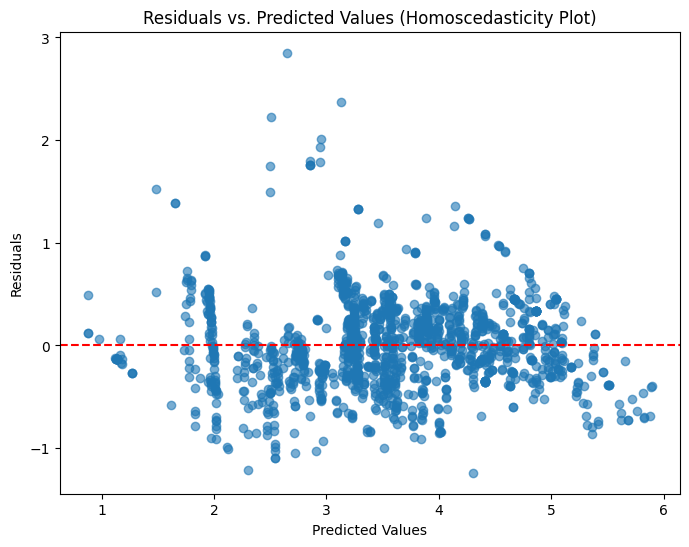

In [35]:
#Step 5.2: Homoscedasticity check
# Get the predicted (fitted) values from the model
predicted_values = model.fittedvalues

# Get the residuals from the model
residuals = model.resid

# Create a scatterplot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Homoscedasticity Plot)")
plt.show()